# CS 677: Machine Learning - Predicting Diabetes

### Christina Hyman, Michael Acevedo, Rachel Manda

# Problem Statement

**Problem Statement**: In this project, we are determining whether someone has diabetes by solving a binary classification problem.

**Dataset**: The dataset used in this project is provided by Mohammed Mustafa on Kaggle <br>
https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset?datasetId=3102947&sortBy=dateRun&tab=collaboration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade scikit-learn

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Explanatory Data Analysis

*All descriptions for EDA are written below the output cell to describe that cell unless noted by [   ] meaning that the description is on top of the input cell* 

• Load and explore the dataset to gain insights.

• Analyze the data distribution, identify missing values, outliers, or anomalies, and visualize the relationships (correlation with heat map) between features.

• Perform data preprocessing tasks such as handling missing values, handling categorical variables, and feature engineering (feature scaling, feature selection, feature transformation, feature extraction, feature creation...)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
df.shape

(100000, 9)

In [6]:
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

**df.nunique()** used to find the number of unique categories within each feature

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

**df.isnull().sum()** used to find the number of missing values

In [8]:
df.duplicated().sum()

3854

**df.duplicated().sum()** used to find the number of duplicates

In [9]:
df.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


**df.drop_duplicates()** used to drop the rows with duplicates

**3854 rows were removed, 96146 rows remaining**

In [10]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

Listing column names

In [11]:
for feature in ['gender', 'smoking_history']:
    categories = df[feature].unique()
    print(feature, categories)

gender ['Female' 'Male' 'Other']
smoking_history ['never' 'No Info' 'current' 'former' 'ever' 'not current']


Listing **categories names** for 'gender' and 'smoking_history' features

In [12]:
df = df[(df['smoking_history'] != 'No Info') & (df['smoking_history'] != 'ever')]

**Removed rows** that contained categories that were **missing info ('No Info')** and that were **unclear ('ever')** from the 'smoking_history' feature

In [13]:
for feature in ['gender', 'smoking_history']:
    categories = df[feature].unique()
    print(feature, categories)

gender ['Female' 'Male' 'Other']
smoking_history ['never' 'current' 'former' 'not current']


Confirmed that categories were dropped from **smoking_history**

In [14]:
# Label encoded categorial features
df['gender'].replace(['Male', 'Female', 'Other'], [0, 1, 2], inplace=True)
df['smoking_history'].replace(['never', 'current', 'former', 'not current'], [0, 1, 2, 3], inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60180 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               60180 non-null  int64  
 1   age                  60180 non-null  float64
 2   hypertension         60180 non-null  int64  
 3   heart_disease        60180 non-null  int64  
 4   smoking_history      60180 non-null  int64  
 5   bmi                  60180 non-null  float64
 6   HbA1c_level          60180 non-null  float64
 7   blood_glucose_level  60180 non-null  int64  
 8   diabetes             60180 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 4.6 MB


**This step [16] is performed to prepare the DataFrame for Feature Transformation.**

x is a df with shape (60180, 8) storing the features

y is a df with shape (60180, 1) storing target feature



In [16]:
x = df.drop('diabetes', axis = 1)
y = df.diabetes

**[17] Feature transformation: Standardize features by scaling them to zero mean and unit variance**


In [17]:
# Perform feature scaling/normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

**[18] Feature Selection: Select Features to Reduce Dimensionality**


In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

# Instantiate the feature selector
selector = SelectKBest(score_func=f_classif, k=4)

# Fit the selector to the data and transform the features
x_new = selector.fit_transform(x, y)

# Get the mask of selected features
mask = selector.get_support()

# Get the names of the selected columns
selected_columns = x.columns[mask]

print(selected_columns)

Index(['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], dtype='object')


Used the **SelectKBest** function of sklearn.feature_selection to perform feature selection with **f_classif**

Used **k = 4** to select the of top 4 features

The statistical test used during the feature selection is the **ANOVA F-value test**.

In [19]:
df = df.drop(['gender', 'hypertension', 'heart_disease', 'smoking_history'], axis=1, inplace=False)

**Removed** features from the DataFrame that showed less significance: **'gender', 'hypertension', 'heart_disease', 'smoking_history'**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60180 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  60180 non-null  float64
 1   bmi                  60180 non-null  float64
 2   HbA1c_level          60180 non-null  float64
 3   blood_glucose_level  60180 non-null  int64  
 4   diabetes             60180 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 2.8 MB


We will use these four features **'age', 'bmi', 'HbA1c_level', 'blood_glucose_level'** to fit into our models to predict 'diabetes'

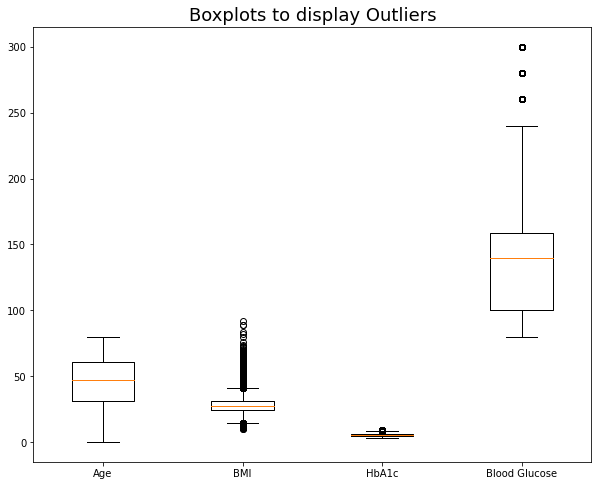

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.boxplot(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
ax.set_xticklabels(['Age', 'BMI', 'HbA1c', 'Blood Glucose'])

plt.title('Boxplots to display Outliers', fontsize=18)

plt.show()

Created a subplot of **box plots to visualize outliers**

Visually, **BMI, HbA1c, and Blood Glucose** contain outliers since there are **instances that lay outside the whiskers**

In [22]:
def remove_outliers(df, cols):
    for col in cols:
        # Calculate quartiles and IQR for the column
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        # Identify outliers using the IQR method
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = ((df[col] < lower) | (df[col] > upper))

        # erplace outliers with NaN
        df[outliers] = pd.NA
    
    # Drop rows with NaN values
    df.dropna(inplace=True)
    
    return df

Created a function **remove_outliers** to remove outliers by using the **IQR method** for the instances containing outliers

In [23]:
df = remove_outliers(df, ['bmi', 'HbA1c_level', 'blood_glucose_level'])
df.shape

(54895, 5)

After **removing the outliers**, we are left with 54895 rows and 5 columns.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54895 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  54895 non-null  object
 1   bmi                  54895 non-null  object
 2   HbA1c_level          54895 non-null  object
 3   blood_glucose_level  54895 non-null  object
 4   diabetes             54895 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB


Somehow, dtype changed to objects when undergoing outlier detection

In [25]:
def dtype_rename_floats(df, cols):
    for col in cols:
        df[col] = df[col].astype(float)

def dtype_rename_integers(df, cols):
    for col in cols:
        df[col] = df[col].astype(int)

dtype_rename_floats(df, ['age', 'bmi', 'HbA1c_level'])
dtype_rename_integers(df, ['blood_glucose_level', 'diabetes'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54895 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  54895 non-null  float64
 1   bmi                  54895 non-null  float64
 2   HbA1c_level          54895 non-null  float64
 3   blood_glucose_level  54895 non-null  int64  
 4   diabetes             54895 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 2.5 MB


**Changed the data types** from objects to floats and integers as required

In [26]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print(f"Categorical Features : {categorical_features}")
print(f"Numerical features : {numerical_features}")

Categorical Features : ['diabetes']
Numerical features : ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']


Split **categorial features** and **numerical features** for easier identification of features when visualizing relationships in the cells below

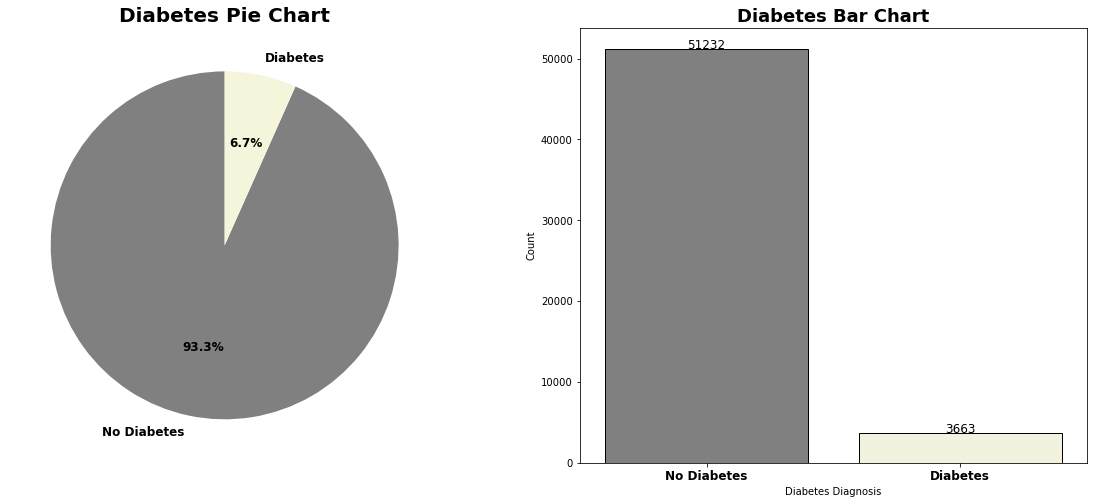

In [27]:
counts = df['diabetes'].value_counts()

# create a pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Define data for the pie chart

labels = ['No Diabetes', 'Diabetes']
colors = ['gray', 'beige']

ax1.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontweight': 'bold', 'fontsize': 12})
ax1.set_title('Diabetes Pie Chart', fontdict={'fontweight': 'bold', 'fontsize': 20})

ax2 = sns.countplot(x='diabetes', data = df ,palette = colors ,edgecolor = 'black')
ax2.set(xlabel='Diabetes Diagnosis', ylabel='Count')
ax2.set_title('Diabetes Bar Chart', fontdict={'fontweight': 'bold', 'fontsize': 18})
for rect in ax2.patches:
    ax2.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 12) 
    ax2.set_xticklabels(['No Diabetes','Diabetes'], fontdict={'fontweight': 'bold', 'fontsize': 12})


plt.show()

**Created data visualizations** through **pie chart and bar chart** that display the percentages and count of "No Diabetes" and "Diabetes" respectively. <br>Evidently, 93.3% of our data contains no Diabetes.

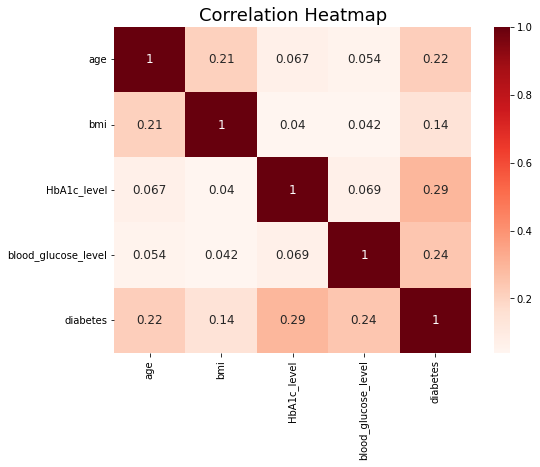

In [28]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='Reds', annot=True, annot_kws={'fontsize': 12})
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

**Created a heatmap of the correlation matrix** to understand and visualize the strength of relationships between the features. <br>Evidently, Blood Glucose Level and HbA1c level both have the strongest correlation with the Diabetes feature, with a r = 0.24 and r = 0.29 respectively.

In [29]:
df.describe()

,age,bmi,HbA1c_level,blood_glucose_level,diabetes
count,54895.000000,54895.000000,54895.000000,54895.000000,54895.000000
mean,45.853654,27.394892,5.475009,135.295364,0.066727
std,19.775760,4.931640,1.003098,35.472459,0.249552
min,0.160000,14.840000,3.500000,80.000000,0.000000
25%,30.000000,24.270000,4.800000,100.000000,0.000000
50%,46.000000,27.320000,5.800000,140.000000,0.000000
75%,61.000000,29.990000,6.200000,158.000000,0.000000
max,80.000000,40.790000,8.200000,240.000000,1.000000


**Generated summary statistics** for each column of the DataFrame to understand the distribution of the data and the summary statistics.

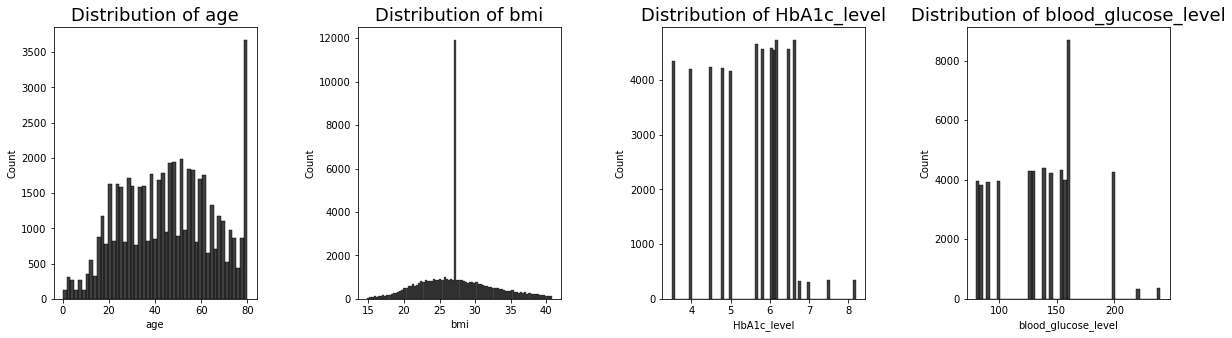

In [30]:
fig, ax = plt.subplots(nrows = 1,ncols = 4,figsize = (20,5))
for i in range(len(numerical_features)):
    plt.subplot(1,4,i+1)
    sns.histplot(df[numerical_features[i]],color='k')
    title = 'Distribution of ' + numerical_features[i]
    plt.title(title, fontsize=18)
    
plt.subplots_adjust(wspace=0.5)
plt.show()

**Created histograms** for the numerical features, that is **age, bmi, HbA1c level and Blood_glucose_level** in order to visualize their distributions. <br> Age and BMI follow closely to a normal distribution. <br> HbA1C_level and blood_glucose_level follow a skew to the right distribution, meaning most of the instances in this dataset have lower levels of HbA1C and blood glucose levels. High values of these two indicators are strong factors in determining whether the person has diabetes. Lower values for these two features assume that the person does not have diabetes.

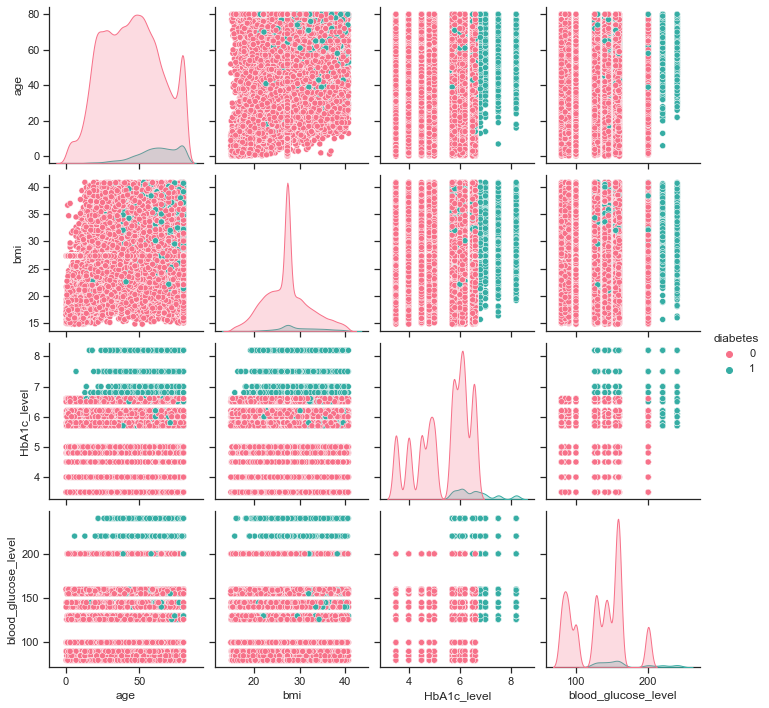

In [31]:
sns.set(style="ticks")
sns.pairplot(df, hue="diabetes", diag_kind="kde", palette="husl")
plt.show()

The seaborn pairplot function uses a **kernel density estimator (KDE)** as the smoother for the diagonal plots. The KDE creates a smooth estimate of the distribution of each variable. By default, the KDE uses Gaussian kernel, which is a type of weighted smoother.

This pairplot displays a diagonal plot of each variable's distribution using kernel density estimation (KDE), and off-diagonal plots of scatter plots for each pair of variables. The scatter plot shows the relationship between the two variables; if dots are clustered around a line, it indicates a strong relationship, while a spread-out plot suggests a weak or no relationship.

In this pairplot above, we can see that the 'No Diabetes' class is pink and the 'Diabetes' class is blue.
On the first diagonal cell, most of the people who have diabetes are older, but this distribution is skew to the left. On the second diagonal cell, people who have diabetes show a normal distribution of BMI. For the third diagonal cell, most of the people who have diabetes have higher levels of HbA1C, and the distribution is still skew to the right. For the last diagonal, most of the people who have diabetes have higher blood glucose levels, and the distribution is still skew to the right.


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54895 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  54895 non-null  float64
 1   bmi                  54895 non-null  float64
 2   HbA1c_level          54895 non-null  float64
 3   blood_glucose_level  54895 non-null  int64  
 4   diabetes             54895 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 4.5 MB


Double check that features are ready to be used

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 42)

**Using the train_test_split function from the sklearn.model_selection module** to split the dataset into two sets: a training set and a testing set with a **test size of 0.20**

In [34]:
from sklearn import svm
from sklearn.svm import LinearSVC

# max_iter=10000 removed warning
svm = LinearSVC(max_iter=10000)
svm.fit(x_train, y_train)

# Calculate the accuracy on the test set
accuracy = svm.score(x_test, y_test)

# Print the accuracy and whether the data is linearly separable
if accuracy == 1.0:
    print("Data is linearly separable")
else:
    print("Data is not linearly separable")

Data is not linearly separable


**SVM Score** is used to determine whether data is linearly separable, meaning that the SVM was able to perfectly separate the two classes in the dataset using a **linear decision boundary**. If the accuracy is less than 1.0, then the data is not linearly separable, and a nonlinear SVM may need to be used to improve the classification performance.

**The dataset at hand is not linearly separable.**

# Model Building of Naive Bayes, Logistic Regression, Decision Tree, and SVM

In this section, we created a function to train the models and pass the trained classifiers through a confusion matrix to determine performance metrics. Then we created a dictionary in three different cells to list the classifiers we used. <br>**Cell [36]** contains the classifiers for Naive Bayes, Logistic Regression, and Decision Trees. <br>**Cell [43]** contains the classifiers for the SVM of the Radial Basis Function and of the Polynomial Kernel. <br>We run SGD separately in cell [44] since there is only one model in that section.

The **Naive Bayes** achieved an **accuracy of 0.9014**, which means that it correctly classified 90.14% of the instances in the testing set. <br>The **precision is 0.5496**, which means that 54.96% of the instances predicted to be positive were actually positive. <br>The **recall is 0.6585**, which means that 65.85% of the actual positive instances were correctly predicted as positive. <br>Lastly, the **F1 score is 0.5991**, which indicates that it achieved a reasonable balance between precision and recall. Suggestably, these performance metrics depict that the logistic regression model is performing well on the testing set and is able to accurately classify instances with high precision and recall.


The **Logistic Regression Model** achieved an **accuracy of 0.9513**, which means that it correctly classified 95.13% of the instances in the testing set. <br>The **precision is 0.8771**, which means that 87.71% of the instances predicted to be positive were actually positive. <br>The **recall is 0.6570**, which means that 65.70% of the actual positive instances were correctly predicted as positive. <br>Lastly, the **F1 score is 0.7513**, which indicates that it achieved a reasonable balance between precision and recall. Suggestably, these performance metrics depict that the logistic regression model is performing well on the testing set and is able to accurately classify instances with high precision and recall.

The **Decision Tree Classifier** achieved an **accuracy of 0.9379**, which means that it correctly classified 93.79% of the instances. <br>The **precision is 0.7155**, which means that 71.55% of the instances predicted to be positive were actually positive. <br>The **recall is 0.7394**, which means that 73.94% of the actual positive instances were correctly predicted as positive. <br>Lastly, the **F1 score of 0.7273**, which indicates that it achieved a reasonable balance between precision and recall. The decision tree classifier portrays a higher accuracy score compared to the logistic regression model, indicating that it might be a better choice for this particular dataset.

**Overall, the Logistic Regression Model performed the best with the highest accuracy score of 0.9513 and F1 score of 0.7513.**

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def model_evaluation(classifiers, x_train, y_train, x_test, y_test, n_rows=1, n_cols=1):

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(8*n_cols, 6*n_rows))
    axs = axs.flatten()
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        # Train the classifier
        clf.fit(x_train, y_train)
        
        # Predict the classes of the test set
        y_pred = clf.predict(x_test)

        # Confusion Matrix
        cm = confusion_matrix(y_test,clf.predict(x_test))

        # Create heatmap with TN, FP, FN, TP and set increase font size in heatmap
        names = ['True Neg','False Pos','False Neg','True Pos']
        counts = [value for value in cm.flatten()]
        labels = [f'{v1}\n{v2}' for v1, v2 in zip(names,counts)]
        labels = np.asarray(labels).reshape(2,2)
        sns.heatmap(cm,annot = labels,cmap = 'Reds',fmt ='', ax=axs[i],annot_kws={'fontsize': 16})

        # Create labels and title    
        axs[i].set_xlabel('Predicted Label', fontsize=16)
        axs[i].set_ylabel('True Label', fontsize=16)
        axs[i].set_title(f"Confusion Matrix for {clf_name}", fontsize=20)

        # Calculate the evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Print the evaluation metrics
        print(f"Classifier: {clf_name}")
        print('Accuracy:', accuracy)
        print('Precision:', precision)
        print('Recall:', recall)
        print('F1 Score', f1)
        print()


Classifier: Naive Bayes
Accuracy: 0.901379195746095
Precision: 0.5495662949194547
Recall: 0.6585003711952487
F1 Score 0.5991219182708545

Classifier: Logistic Regression
Accuracy: 0.951312728481223
Precision: 0.8771060455896927
Recall: 0.6570155902004454
F1 Score 0.7512733446519525

Classifier: Decision Tree
Accuracy: 0.9380192755068129
Precision: 0.7172812725958062
Recall: 0.7364513734224202
F1 Score 0.7267399267399267



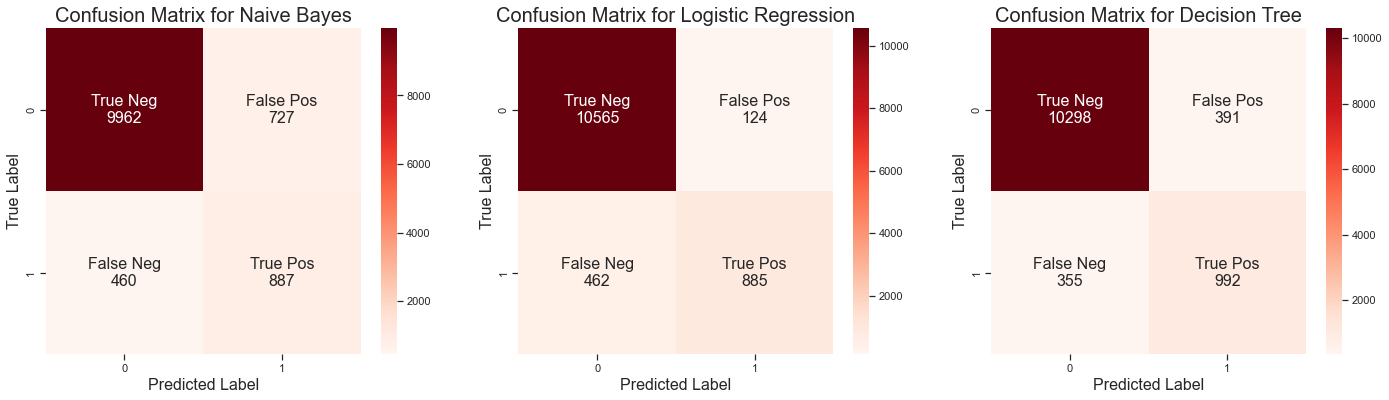

In [36]:
# Define the classifiers as a dictionary of the classifiers' name and the model with default parameters
classifiers = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
}

model_evaluation(classifiers, x_train, y_train, x_test, y_test, n_rows=1, n_cols=3)

## Visual of Decision Tree

We experimented with the plot_tree library to created a visual of a Decision Tree Classifier with max_depth=5. <br>This was insightful to see how our model performs visually for Decision Tree Classifiers

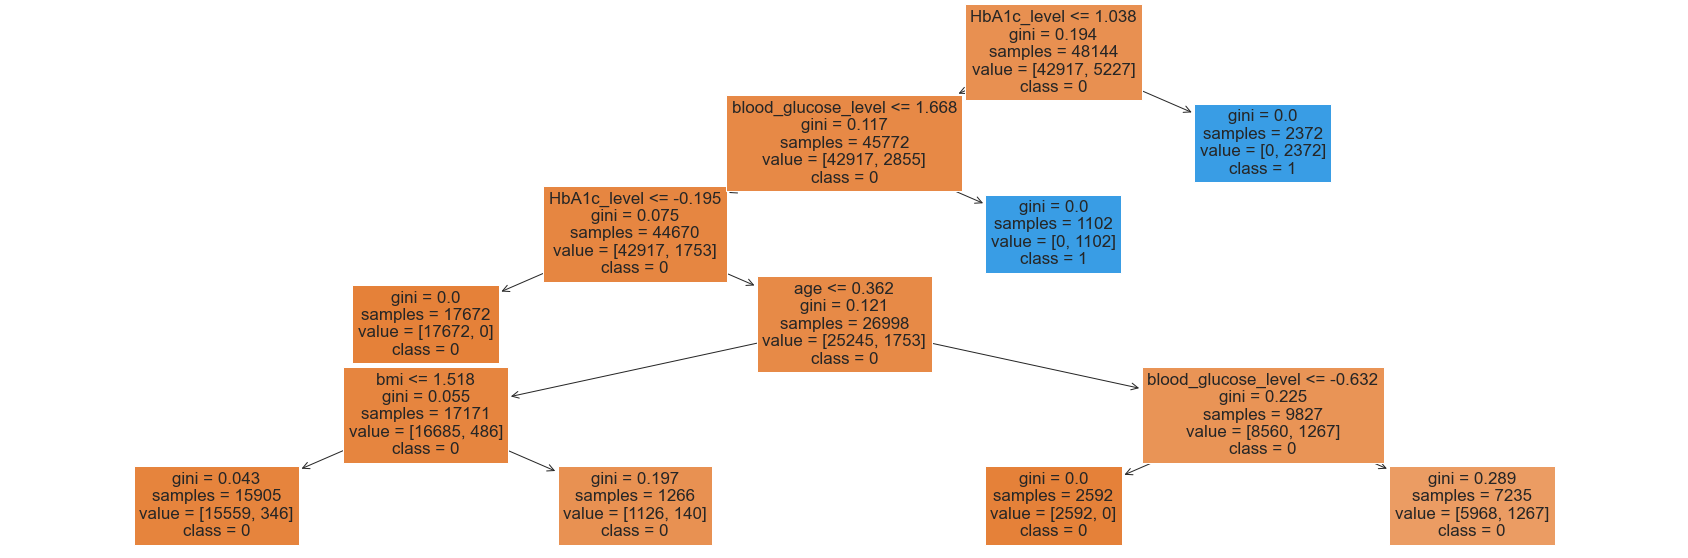

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create and fit the decision tree model
clf = DecisionTreeClassifier(max_depth =5, random_state = 42)
clf.fit(x_train, y_train)

# Plot the decision tree
plt.figure(figsize=(30,10))
plot_tree(clf, feature_names=x.columns, class_names = ["0", "1"], filled=True)
plt.show()

## Overfitting using Learning Curves


**Learning Curve for GaussianNB:**

The Learning Curve for the GaussianNB overlaps initially, but it is worth noting that as the number of samples increases, the test accuracy is slightly higher than the training accuracy. Overall, they overlap very closely throughout the entire range of samples, indicating that the model is able to generalize well to unseen data, as it is performing similarly on both the training and test sets. The accuracy is the lowest for this classifier.


**Learning Curve for LogisticRegression:**

The Learning Curve for the LogisticRegression started with a higher training accuracy and lower test accuracy at the beginning (indicating overfitting), band then the two accuracies convergence as the number of sammples in the training set increases, indicating that the model is learning and improving its performance on the validation set, while avoiding overfitting.


**Learning Curve for DecisionTreeClassifier:**

The Learning Curve for the DecisionTreeClassifier has a training accuracy of nearly 1.00 and a lower test accuracy of roughly 0.94. As the number of training samples increases, the gap in between the testing and training accuracy mantains the same distance. This represent a model that overfits the training data; the model is too complex and does not generalize well. It is not advised to choose this Decision Tree Classifier.

**Based on the output of the Confusion Matrices, we would select the Logistic Regression Classifier.**

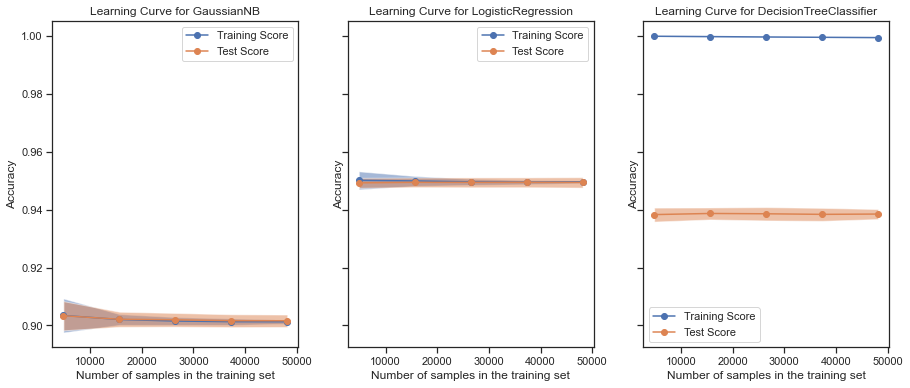

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6), sharey=True)

common_params = {
    "X": x,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}



for ax_idx, estimator in enumerate([GaussianNB(), LogisticRegression(penalty='l2', C=1.0, max_iter=500), DecisionTreeClassifier(random_state = 42)]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

## K-fold Cross Validation

For each model, we implemented a function that would test for different values of k (ranging from 2 to 30 folds), and compared the values of each k_fold_mean to determine which value of k is optimal for cross-validation. The k_fold_mean refers to the average of the accuracy over "k" folds, therefore the value of k that results in the highest value of k_fold_mean is optimal.

For the Naive Bayes Classifier, the optimal value for K is 25, and the optimal k_fold_mean is 0.902002368140686
<br>For the Logistic Regression Classifier, the optimal value for K is 12, and the optimal k_fold_mean is 0.9494848786972417
<br>For the Decision Tree Classifier, the optimal value for K is 14 and the optimal k_fold_mean is 0.9406157214698448

**The Logistic Regression Classifier continues to perform the best with the highest k_fold_mean score of 0.9494848786972417.**

In [39]:
from sklearn.model_selection import cross_val_score
i=1
best_k = -1
best_k_mean = 0
for i in range (2, 31):
    nb_k_fold_acc = cross_val_score(GaussianNB(),x_train,y_train,cv=i)
    nb_k_fold_mean = nb_k_fold_acc.mean()
    if (nb_k_fold_mean > best_k_mean):
        best_k_mean = nb_k_fold_mean
        best_k = i
    print('( k =', i, ') Naive Bayes K-Fold Mean:', nb_k_fold_mean)
    i += 1
print('The optimal value for K is: ', best_k)

( k = 2 ) Naive Bayes K-Fold Mean: 0.9015661349285476
( k = 3 ) Naive Bayes K-Fold Mean: 0.9017946161515452
( k = 4 ) Naive Bayes K-Fold Mean: 0.9018569292123629
( k = 5 ) Naive Bayes K-Fold Mean: 0.9016492447276294
( k = 6 ) Naive Bayes K-Fold Mean: 0.9016699900299101
( k = 7 ) Naive Bayes K-Fold Mean: 0.9017323320061674
( k = 8 ) Naive Bayes K-Fold Mean: 0.9017323030907278
( k = 9 ) Naive Bayes K-Fold Mean: 0.9017115183649587
( k = 10 ) Naive Bayes K-Fold Mean: 0.9018154215314368
( k = 11 ) Naive Bayes K-Fold Mean: 0.9017947074713185
( k = 12 ) Naive Bayes K-Fold Mean: 0.9018153871718178
( k = 13 ) Naive Bayes K-Fold Mean: 0.901898427282011
( k = 14 ) Naive Bayes K-Fold Mean: 0.9018363030308697
( k = 15 ) Naive Bayes K-Fold Mean: 0.901836203797277
( k = 16 ) Naive Bayes K-Fold Mean: 0.9018569292123629
( k = 17 ) Naive Bayes K-Fold Mean: 0.901815387171818
( k = 18 ) Naive Bayes K-Fold Mean: 0.9018570659657903
( k = 19 ) Naive Bayes K-Fold Mean: 0.9018570783901165
( k = 20 ) Naive Baye

In [40]:
i=1
best_k = -1
best_k_mean = 0
for i in range (2, 31):
    lr_k_fold_acc = cross_val_score(LogisticRegression(),x_train,y_train,cv=i)
    lr_k_fold_mean = lr_k_fold_acc.mean()
    if (lr_k_fold_mean > best_k_mean):
        best_k_mean = lr_k_fold_mean
        best_k = i
    print('( k =', i, ') Logistic Regression K-Fold Mean:', lr_k_fold_mean)
    i += 1
print('The optimal value for K is: ', best_k)

( k = 2 ) Logistic Regression K-Fold Mean: 0.9491525423728814
( k = 3 ) Logistic Regression K-Fold Mean: 0.9493187105350614
( k = 4 ) Logistic Regression K-Fold Mean: 0.9494017946161515
( k = 5 ) Logistic Regression K-Fold Mean: 0.9494433684976439
( k = 6 ) Logistic Regression K-Fold Mean: 0.9493602525756066
( k = 7 ) Logistic Regression K-Fold Mean: 0.9493603295888436
( k = 8 ) Logistic Regression K-Fold Mean: 0.9494017946161515
( k = 9 ) Logistic Regression K-Fold Mean: 0.9494226636047887
( k = 10 ) Logistic Regression K-Fold Mean: 0.9494019347343181
( k = 11 ) Logistic Regression K-Fold Mean: 0.9494434871511905
( k = 12 ) Logistic Regression K-Fold Mean: 0.9494848786972417
( k = 13 ) Logistic Regression K-Fold Mean: 0.9493604328932814
( k = 14 ) Logistic Regression K-Fold Mean: 0.9494018363815684
( k = 15 ) Logistic Regression K-Fold Mean: 0.949339652528406
( k = 16 ) Logistic Regression K-Fold Mean: 0.9492356264539714
( k = 17 ) Logistic Regression K-Fold Mean: 0.9493602525756065
(

In [41]:
i=1
best_k = -1
best_k_mean = 0
for i in range (2, 31):
    dt_k_fold_acc = cross_val_score(DecisionTreeClassifier(random_state=42),x_train,y_train,cv=i)
    dt_k_fold_mean = dt_k_fold_acc.mean()
    if (dt_k_fold_mean > best_k_mean):
        best_k_mean = dt_k_fold_mean
        best_k = i
    print('( k =', i, ') Decision Tree K-Fold Mean:', dt_k_fold_mean)
    i += 1
print('The optimal value for K is: ', best_k)

( k = 2 ) Decision Tree K-Fold Mean: 0.9384139248919907
( k = 3 ) Decision Tree K-Fold Mean: 0.938870887337986
( k = 4 ) Decision Tree K-Fold Mean: 0.9404702558989697
( k = 5 ) Decision Tree K-Fold Mean: 0.9382893551853965
( k = 6 ) Decision Tree K-Fold Mean: 0.937375373878365
( k = 7 ) Decision Tree K-Fold Mean: 0.9378115753908604
( k = 8 ) Decision Tree K-Fold Mean: 0.9396394150880691
( k = 9 ) Decision Tree K-Fold Mean: 0.9381853538874415
( k = 10 ) Decision Tree K-Fold Mean: 0.9388709289839559
( k = 11 ) Decision Tree K-Fold Mean: 0.9381024905483509
( k = 12 ) Decision Tree K-Fold Mean: 0.9397432701894318
( k = 13 ) Decision Tree K-Fold Mean: 0.9380606150107879
( k = 14 ) Decision Tree K-Fold Mean: 0.9406157214698448
( k = 15 ) Decision Tree K-Fold Mean: 0.9393280580610025
( k = 16 ) Decision Tree K-Fold Mean: 0.9405325689597873
( k = 17 ) Decision Tree K-Fold Mean: 0.938185443668993
( k = 18 ) Decision Tree K-Fold Mean: 0.9386632399530576
( k = 19 ) Decision Tree K-Fold Mean: 0.93

In [42]:
nb_k_fold_acc = cross_val_score(GaussianNB(),x_train,y_train,cv=25)
nb_k_fold_mean = nb_k_fold_acc.mean()
print('Naive Bayes K-Fold Mean:', nb_k_fold_mean, '\n')
lr_k_fold_acc = cross_val_score(LogisticRegression(),x_train,y_train,cv=12)
lr_k_fold_mean = lr_k_fold_acc.mean()
print('Logistic Regression K-Fold Mean:', lr_k_fold_mean, '\n')
dt_k_fold_acc = cross_val_score(DecisionTreeClassifier(random_state=42),x_train,y_train,cv=14)
dt_k_fold_mean = dt_k_fold_acc.mean()
print('Decision Tree K-Fold Mean:', dt_k_fold_mean)

Naive Bayes K-Fold Mean: 0.902002368140686 

Logistic Regression K-Fold Mean: 0.9494848786972417 

Decision Tree K-Fold Mean: 0.9406157214698448


## Support Vector Machine with Radial Basis Function Kernel and Polynomial Kernel

The **RBF Kernel SVM** classifier achieved a **test score of 0.9537**, which means that it correctly classified 95.37% of the instances. Similarly, the **Polynomial Kernel SVM** classifier achieved a **test score of 0.9546**, which means that it correctly classified 95.46% of the instances. 

Comparing the two scores, we see that the **Polynomial Kernel SVM** classifier perfomed better than the SVM RBF kernel classifier than the RBF Kernel SVM as it has a **slightly higher accuracy score**.

We did not use a Linear Kernel since our data is not linearly separable.

Classifier: SVM Radial Basis Function
Accuracy: 0.9537221668328348
Precision: 0.9782082324455206
Recall: 0.5998515219005197
F1 Score 0.7436723423838012

Classifier: SVM Polynomial
Accuracy: 0.9546360917248256
Precision: 0.9854545454545455
Recall: 0.6035634743875279
F1 Score 0.7486187845303868



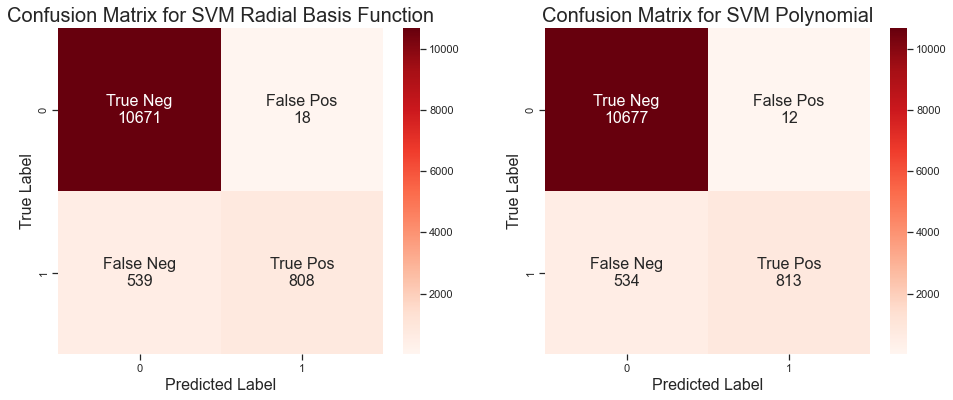

In [43]:
# Define the classifiers for Support Vector Machines with Kernel Functions
classifiers = {
    'SVM Radial Basis Function': SVC(kernel='rbf', C=1),
    'SVM Polynomial': SVC(kernel='poly', C=1),
}

model_evaluation(classifiers, x_train, y_train, x_test, y_test, n_rows=1, n_cols=2)

# Stochastic Gradient Descent (SGD) Optimizer

The **Logistic Regression SGD** classifier achieved a test score of 0.9485, which means that it correctly classified 95.85% of the instances.

Comparing the two scores, we see that the **Logistic Regression** classifier has a **slightly higher accuracy score** than the Logistic Regression SGD classifier.

We only included SGD for Logistic Regression and excluded the SVM SGD since our data is not linearly separable.

Classifier: SGD Logistic Regression
Accuracy: 0.9484878697241609
Precision: 0.8690355329949239
Recall: 0.635486265775798
F1 Score 0.7341337907375642



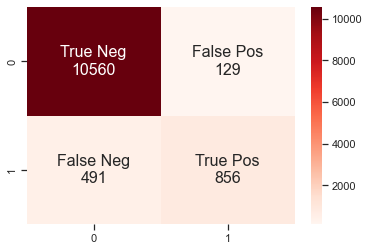

In [44]:
sgd_logreg = SGDClassifier(loss='log_loss', random_state=42)
sgd_logreg.fit(x_train, y_train)

# Predict the labels for the testing data
y_pred = sgd_logreg.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap with TN, FP, FN, TP and set increase font size in heatmap
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(names,counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, cmap='Reds', fmt='', annot_kws={'fontsize': 16})

# Create labels and title    
ax1.set_xlabel('Predicted Label', fontsize=16)
ax1.set_ylabel('True Label', fontsize=16)
ax1.set_title("Confusion Matrix for SGD Logistic Regression", fontsize=20)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Classifier: SGD Logistic Regression")
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score', f1)
print()


# Hyperparameter Tuning

The optimal hyperparameters are printed below for : **Logistic Regression Classifier, Decision Tree Classifier, SGD Classifier**

Hyperparameters were not included for Naive Bayes since there are no parameters. In addition, no hyperparameters are printed for SVM Classifiers because they were extremely computationally expensive. 


For the **Logistic Regression Classifier**, C = 10 is more optimal instead of the default C = 1. The parameter C controls the regularization. Larger values of C reduce the amount of regularization, allowing the model to have larger weights and potentially fit the training data more closely. So this optimal value chose to enforce less regularization.


For the **Decision Tree Classifier**, the Gini Index was the default measure used for feature selection of the Decision Tree, which is the default for the parameter criterion. Lower values for the rest of the parameters were preferred. However, we feel that the lower value for minimum number of samples may overfit (max_leaf_nodes = 10), so it would be interesting what other types of pruning methods could be used.

For the **SGD Logistic Regression Classifier**, the penalty term l1 is more optimal, which is the Lasso regularization term. This adds a penalty term to the cost function of the model and forces the model to reduce the values of some of the weights to zero, effectively performing feature selection and simplifying the model. In addition, the smallest learning rate of 0.001 was preferred.

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Define hyperparameter grids for each classifier
logreg_param_grid = {'C': [0.1, 1, 10], 
                      'max_iter': [100, 500, 1000]}

decision_tree_param_grid = {'criterion': ['gini', 'entropy'],
                            'max_depth': [3, 5, 7], 
                            'max_leaf_nodes': [100, 1000, 5000], 
                            'min_samples_leaf': [10, 50, 100, 500, 1000, 5000]}

sgd_param_grid = {'loss': ['log_loss'],
                  'alpha': [0.001, 0.01, 1],
                  'penalty': ['l1', 'l2', 'elasticnet'],
                  'max_iter': [100, 500, 1000]}

# We wanted to run a Support Vector Classifier GridSearch, but it is taking to long to run, so we commented it out.
'''
svc_param_grid = {'C': [0.0001, 0.01, 1],
                  'kernel': ['rbf', 'poly'], 
                  'gamma': [0.1, 1, 5]}
svc = SVC()
svc_grid_search = GridSearchCV(svc, svc_param_grid, cv=5)
svc_grid_search.fit(x_train, y_train)
print("Best hyperparameters for Support Vector Classifier: ", svc_grid_search.best_params_)
print("Best score for Support Vector Classifier: ", svc_grid_search.best_score_)
'''

# Create classifier objects
logreg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
sgd = SGDClassifier()


# Create GridSearchCV objects with hyperparameter grids and classifiers
logreg_grid_search = GridSearchCV(logreg, logreg_param_grid, cv=5)
decision_tree_grid_search = GridSearchCV(decision_tree, decision_tree_param_grid, cv=5)
sgd_grid_search = GridSearchCV(sgd, sgd_param_grid, cv=5)

# Fit GridSearchCV objects to the data
logreg_grid_search.fit(x_train, y_train)
decision_tree_grid_search.fit(x_train, y_train)
sgd_grid_search.fit(x_train, y_train)


# Print the best hyperparameters and the corresponding score for each classifier
print("Best hyperparameters for Logistic Regression Classifier: ", logreg_grid_search.best_params_)
print("Best score for Logistic Regression Classifier: ", logreg_grid_search.best_score_)
print()
print("Best hyperparameters for Decision Tree Classifier: ", decision_tree_grid_search.best_params_)
print("Best score for Decision Tree Classifier: ", decision_tree_grid_search.best_score_)
print()
print("Best hyperparameters for SGD Classifier:", sgd_grid_search.best_params_)
print("Best score for SGD Classifier:", sgd_grid_search.best_score_)

Best hyperparameters for Logistic Regression Classifier:  {'C': 10, 'max_iter': 100}
Best score for Logistic Regression Classifier:  0.9494849096753363

Best hyperparameters for Decision Tree Classifier:  {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 100, 'min_samples_leaf': 10}
Best score for Decision Tree Classifier:  0.9635883875926495

Best hyperparameters for SGD Classifier: {'alpha': 0.001, 'loss': 'log_loss', 'max_iter': 500, 'penalty': 'elasticnet'}
Best score for SGD Classifier: 0.9493810545737945


# Project Conclusion Report

The learning algorithms used in our dataset are Naive Bayes, Logistic regression and Decision Tree. Each of the models have the ability to capture non-linear relationships between input features and target labels.<br>**Here's why each of these models were chosen:**
1. **Naive Bayes**: It is a probabilistic model that computes the likelihood of each class label given the input features. It assumes that the features are conditionally independent given the class label. Although this assumption might not always hold true in practice, Naive Bayes can still effectively model non-linear relationships by learning the class-conditional probabilities for each feature.
2. **Logistic Regression**: While this is a linear model, it can be used to model non-linear relationships by incorporating non-linear transformations of the input features or by using kernel methods like the **Radial Basis Function (RBF) kernel** or the **Polynomial kernel** (as performed on our dataset), can project the data into a higher-dimensional space where the data becomes linearly separable, which allows the logistic regression model to learn non-linear patterns in the original dataset.
3. **Decision Tree**: It is a non-parametric model that recursively splits the feature space into regions based on the input features. The model makes decisions by asking a series of questions based on the feature values, which allows it to capture complex, non-linear relationships between features and class labels. This makes Decision Trees particularly suitable for modeling non-linear datasets.
<br><br>**From the metrics, we can see that the Logistic Regression model has the highest Accuracy of 0.9513 and F1 Score of 0.7513, followed by the Decision Tree model, and finally the Naive Bayes model.** It also has the highest Precision of 0.8771, which means that it is better at identifying only relevant instances.<br>However, the Decision Tree model has a slightly better Recall of 0.7394, meaning it is better at identifying all relevant instances. Based on these performance metrics, the Logistic Regression model seems to be the best model for this specific dataset. It has the highest Accuracy, Precision, and F1 Score, suggesting a well-balanced performance.
<br><br>**Why Logistic Regression performed better than Naive Bayes and Decision Tree?**
<br>Logistic Regression is sensitive to the scale of input features, and it tends to perform better when the features are scaled. The Logistic Regression model is higher in complexity than Naive Bayes, so it will more than likely perform better. In addition, Decision Tree Classifiers tend to overfit the training data and ultimately perform less well when generalizing.
<br><br>**Impacts of implementing Stochastic Gradient Descent (SGD) Optimizer**
<br>**The original Logistic Regression classifier achieved higher accuracy of 0.9513 while the SGD Logistic Regression classifier achieved accruracy of 0.9485.*** Implementation of SGD may not be necessary.
<br><br>In addition we found the results of our hyperparameter tuning a bit surprising, and accuracy overall didn’t change. 
